Build a model to understand and model evaluation(accuracy,precision and recall)

In [44]:
# import dataset and important libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [45]:


# Load the dataset
data = load_breast_cancer()

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add the target variable to the DataFrame
df['target'] = data.target

# Display the first few rows of the DataFrame
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [46]:
df["target"].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [48]:
X = data.data
y = data.target

In [49]:
# split the data 
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
# build a model 
from sklearn.linear_model import LogisticRegression

lr_model=LogisticRegression()
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

In [52]:
# model evaluation 
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,confusion_matrix

### Accuracy


​

Accuracy is the ratio of correctly predicted instances to the total number of instances. It provides an overall measure of how well the model performs across all classes and is particularly useful when the class distribution is balanced.

Accuracy= TP+TN/TP+TN+FP+FN

​


Where:
- **TP**: True Positives
- **TN**: True Negatives
- **FP**: False Positives
- **FN**: False Negatives

### Precision


Precision is the ratio of correctly predicted positive observations to the total predicted positives. It is particularly useful when the cost of false positives is high, such as in medical diagnoses.

Precision= TP+FP/TP
​

Where:
- **TP**: True Positives
- **FP**: False Positives

### Recall


Recall (also known as Sensitivity or True Positive Rate) is the ratio of correctly predicted positive observations to all actual positives. It is useful when the cost of false negatives is high, such as in detecting rare diseases.

Recall= TP/TP+FN

Where:
- **TP**: True Positives
- **FN**: False Negatives


In [53]:
# model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')

Accuracy: 0.97
Precision: 0.97
Recall: 0.99


Classification Report

The classification report provides a comprehensive evaluation of a classification model's performance. It includes several key metrics that give insights into how well the model performs on different classes.

The classification report is a valuable tool for understanding the strengths and weaknesses of a classification model. It is particularly useful for evaluating models in multi-class scenarios and assessing performance on individual classes.

In [54]:
classification_rep=classification_report(y_pred,y_test)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        42
           1       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Confusion Matrix

A confusion matrix is a performance measurement tool for classification problems. It shows the number of correct and incorrect predictions made by the model, broken down by class. This matrix helps visualize the performance of a classification model

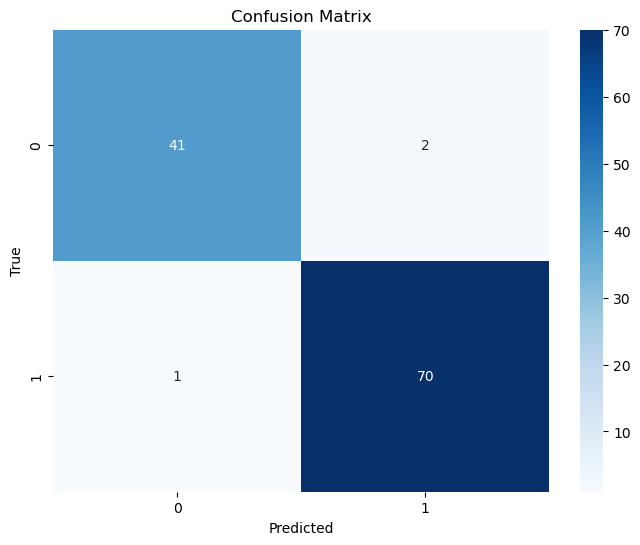

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
